## Linear Regression Assignment

- Name: Gautam Bhutani
- Email: bhutanigautam185@gmail.com
- Batch: C37

# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.



The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Import the required libraries and load dataset

In [1]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [2]:
#load the dataset
bike_df = pd.read_csv('day.csv')

In [3]:
#checking the shape of the dataset
bike_df.shape

(730, 16)

In [4]:
#Checking the columns
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Load the data dictionary

**=========================================**
Dataset characteristics
**=========================================**	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================

#### Checking out the missing values 

In [5]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#reating a variable ratio of casual to registered users to see the trend
bike_df['ratio']=bike_df['casual']/bike_df['registered']

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
 16  ratio       730 non-null    float64
dtypes: float64(5), int64(11), object(1)
memory usage: 97.1+ KB


In [8]:
bike_df.drop_duplicates(subset=None, inplace=True)

In [9]:
#Converting the dteday column to datetime object
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])

In [10]:
bike_df['weekday'].value_counts()

6    105
0    105
1    104
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

There was something wrong with the data when checked thouroghly:
    
01-03-2019 was tagged wrongly as Saturday although it was Friday. I corrected it. 

In [11]:
#For better visualisation and EDA we can use the original names 
bike_df['yr'].replace({0:2018, 1:2019},inplace = True)

bike_df['season'].replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)

bike_df['weathersit'].replace({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'},inplace = True)

bike_df['mnth'].replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'June',
                  7: 'July',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'},inplace = True)

bike_df['weekday'].replace({0: 'Tue',1: 'Wed',2: 'Thu',3: 'Fri',4: 'Sat',5: 'Sun',6: 'Mon'},inplace = True)

In [12]:
# #Before dropping date, let us introduce a days_old variable which indicates how old is the business
# bike_df['days_old'] = (pd.to_datetime(bike_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [13]:
#Dropping dteday as we have already have month and weekday columns to work with
bike_df.drop(['dteday'], axis = 1, inplace = True)

#Droping instant column as it is the index column
bike_df.drop(['instant'], axis = 1, inplace = True)

#Dropping casual and registered columns as both these are equal to the "cnt" column 

bike_df.drop(['casual'], axis = 1, inplace = True)
bike_df.drop(['registered'], axis = 1, inplace = True)

In [14]:
bike_df.corr()[['cnt']].T

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,ratio
cnt,0.57,-0.07,0.06,0.63,0.63,-0.10,-0.24,1.00,0.24


In [15]:
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,ratio
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,2018.50,0.03,0.68,20.32,23.73,62.77,12.76,4508.01,0.24
std,0.50,0.17,0.47,7.51,8.15,14.24,5.20,1936.01,0.19
min,2018.00,0.00,0.00,2.42,3.95,0.00,1.50,22.00,0.01
25%,2018.00,0.00,0.00,13.81,16.89,52.00,9.04,3169.75,0.11
50%,2018.50,0.00,1.00,20.47,24.37,62.62,12.13,4548.50,0.17
75%,2019.00,0.00,1.00,26.88,30.45,72.99,15.63,5966.00,0.27
max,2019.00,1.00,1.00,35.33,42.04,97.25,34.00,8714.00,1.04


## Visualizing the values for better interpretation

In [16]:
##'season','yr','mnth','holiday','weekday','workingday','weathersit'

In [17]:
#Distribution and box plots function
def bi_plots(var):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.title(f"{var} Distribution", fontdict = {'fontsize' : 20})
    for i in bike_df[var].unique():
        sns.distplot(bike_df[(bike_df[var]==i)]['cnt'], hist=False,rug=True)
    plt.subplot(1,2,2)
    plt.title(f"{var} vs Count", fontdict = {'fontsize' : 20})
    sns.boxplot(x=var, y='cnt',data=bike_df)
    plt.show()

### Year vs Cnt

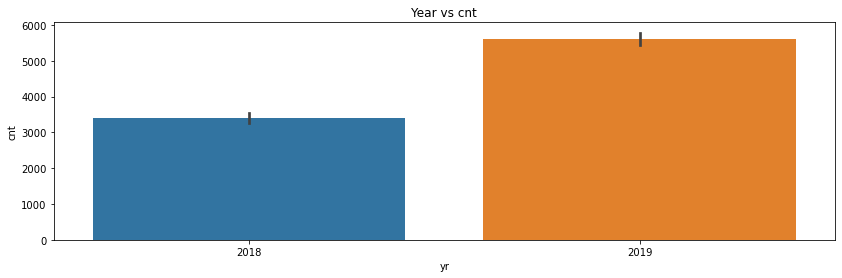

In [18]:
plt.figure(figsize=(14,4))
sns.barplot(x='yr',y='cnt',data=bike_df)
plt.title("Year vs cnt")
plt.show()

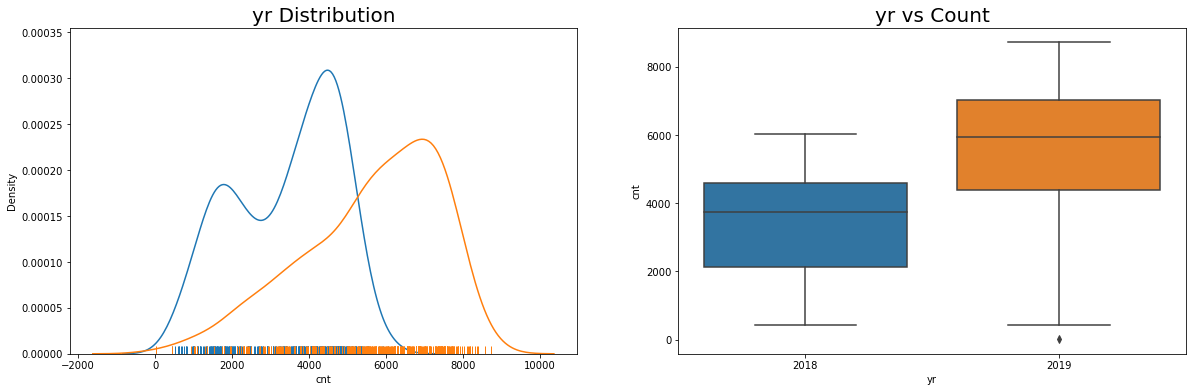

In [19]:
bi_plots('yr')

**Inference**:
    
We can see that there are more bookings in the year 2019 as compared to 2018.

### Month vs Cnt

<AxesSubplot:title={'center':'2019 count'}, xlabel='mnth', ylabel='cnt'>

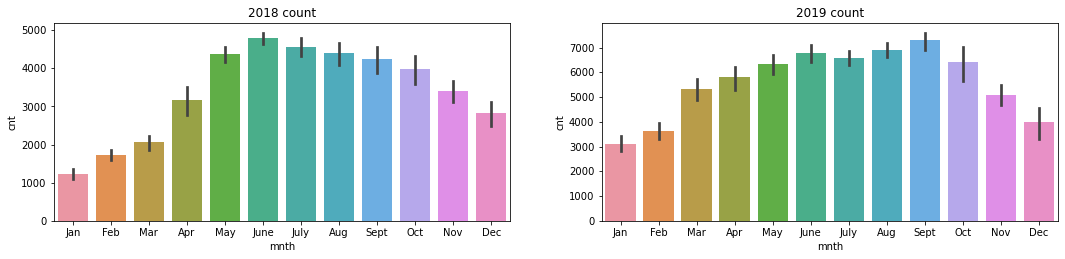

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
plt.title("2018 count")
sns.barplot(x='mnth',y='cnt',data=bike_df[bike_df['yr']==2018])
plt.subplot(2,2,2)
plt.title("2019 count")
sns.barplot(x='mnth',y='cnt',data=bike_df[bike_df['yr']==2019])

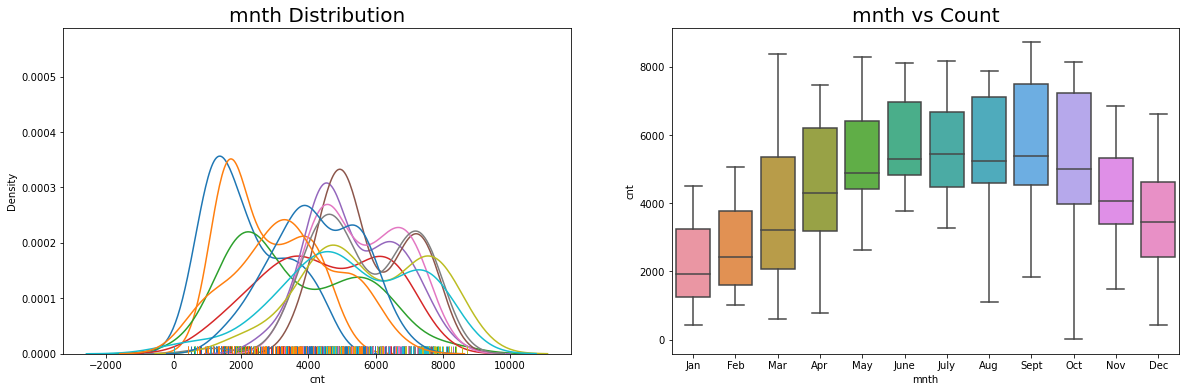

In [21]:
bi_plots('mnth')

**Inference**

Most of the bookings has been done during the month of May, June, Aug, Sep and Oct. Trend increases starting from March till October and then it started decreasing as we approached the end of year. The highest cnt is obtained in the month of September because US experiences a clear weather. 

### Season vs Cnt

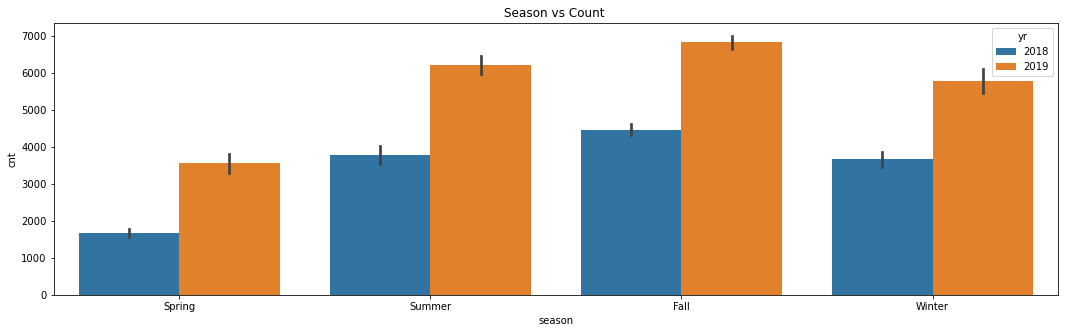

In [22]:
plt.figure(figsize=(18,5))
plt.title("Season vs Count ")
sns.barplot(x='season',y='cnt',data=bike_df,hue='yr')
plt.show()

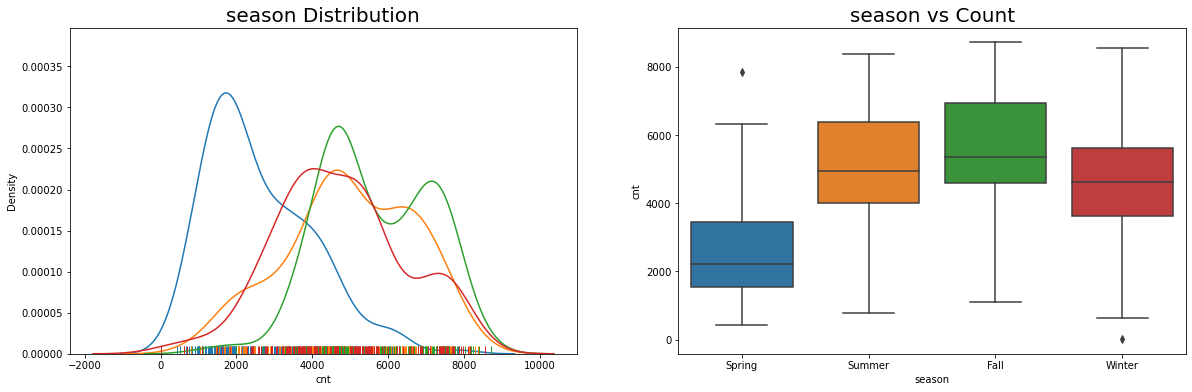

In [23]:
bi_plots('season')

**Inference**

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

### Weekday vs Cnt

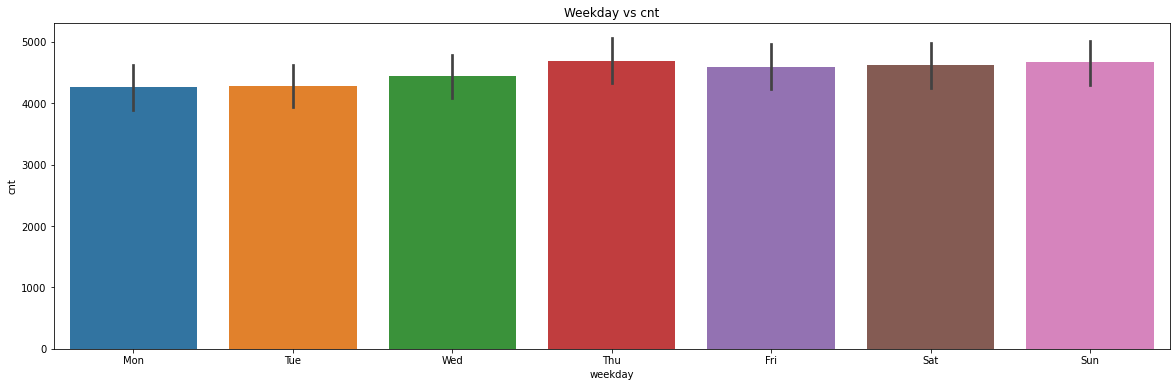

In [24]:
plt.figure(figsize=(20,6))
sns.barplot(x='weekday',y='cnt',data=bike_df)
plt.title("Weekday vs cnt")
plt.show()

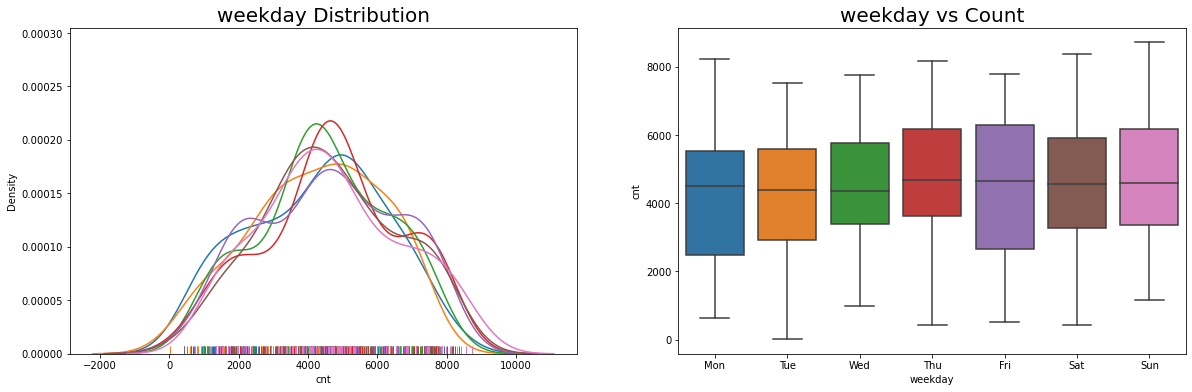

In [25]:
bi_plots('weekday')

**Inference**

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

### Workingday vs Cnt

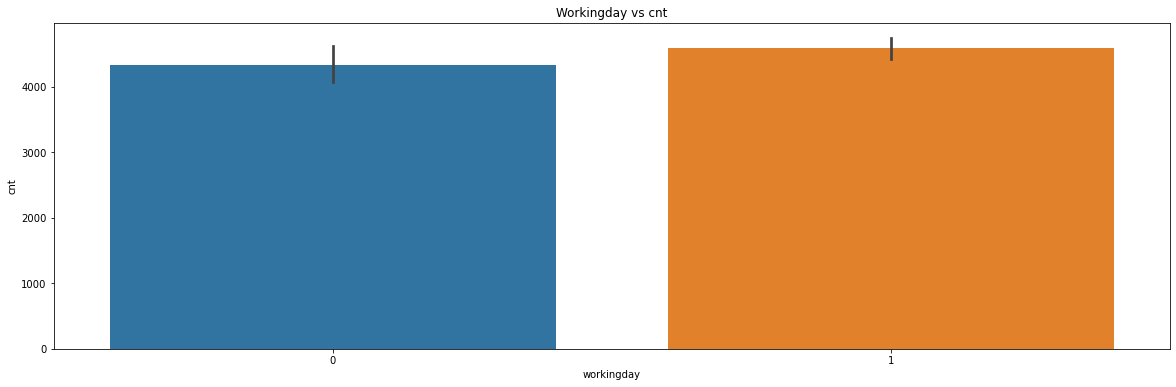

In [26]:
plt.figure(figsize=(20,6))
sns.barplot(x='workingday',y='cnt',data=bike_df)
plt.title("Workingday vs cnt")
plt.show()

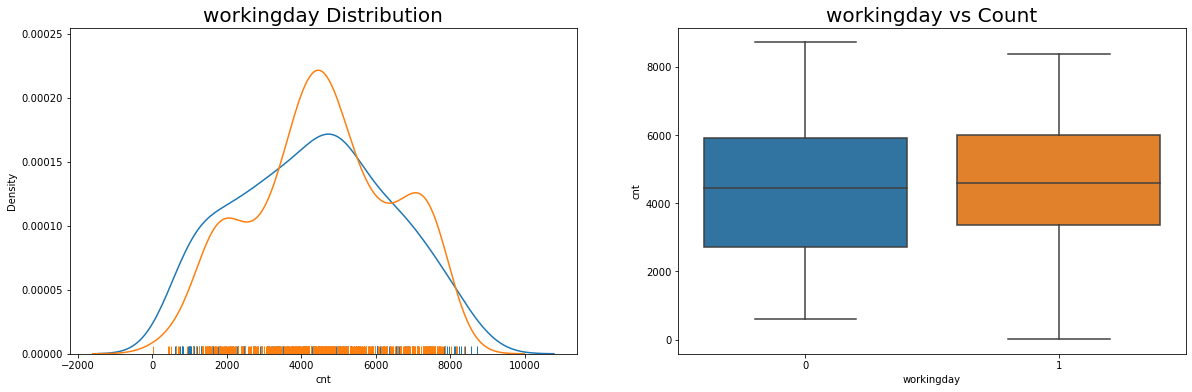

In [27]:
bi_plots('workingday')

**Inference**

Booking seemed to be almost equal either on working day or non-working day.

## weathersit

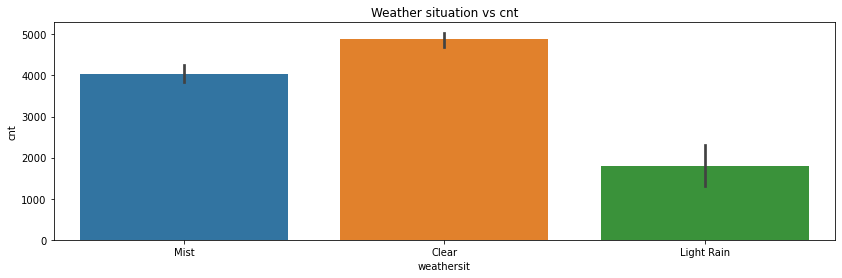

In [28]:
plt.figure(figsize=(14,4))
sns.barplot(x='weathersit',y='cnt',data=bike_df)
plt.title("Weather situation vs cnt")
plt.show()

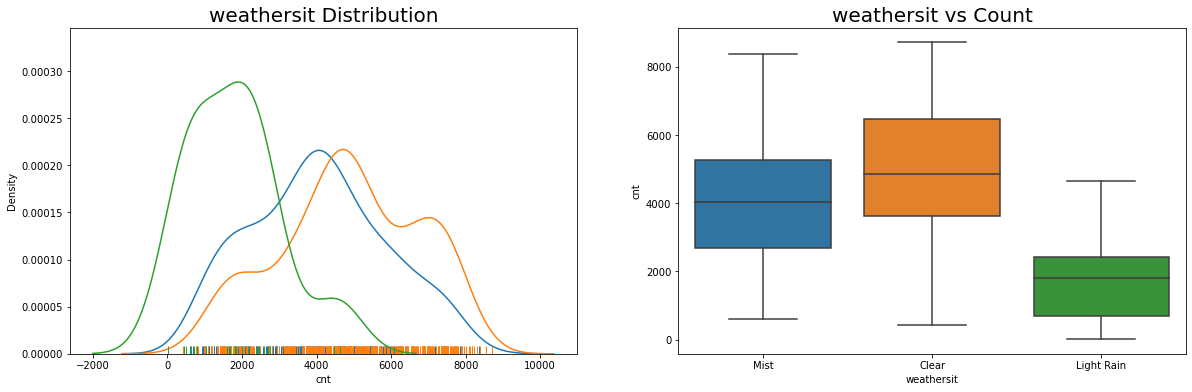

In [29]:
bi_plots('weathersit')

**Inference**

Clear weather situations have high cnt values for bike sharing. 

#### Just plotting the ratio of the casual to registered users to see the trend in the bookings

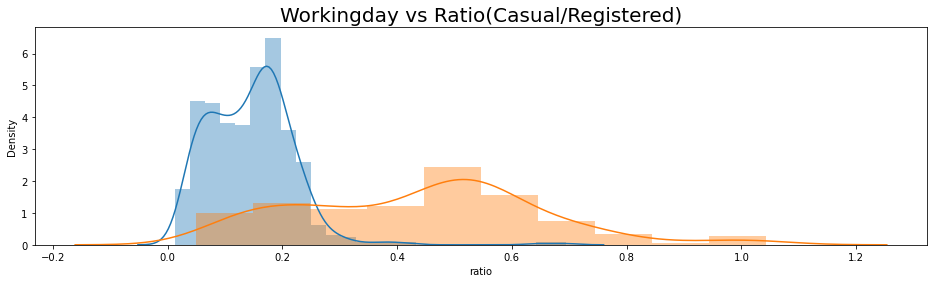

In [30]:
plt.figure(figsize=(16,4))
sns.distplot(bike_df[bike_df['workingday']==1]['ratio'])
sns.distplot(bike_df[bike_df['workingday']==0]['ratio'])
plt.title( "Workingday vs Ratio(Casual/Registered)", fontdict = {'fontsize' : 20})
plt.show()

In [31]:
# sns.distplot(bike_df[(bike_df['workingday']==0) & (bike_df['weathersit']==1)]['registered'],color='red')
# sns.distplot(bike_df[(bike_df['workingday']==0) & (bike_df['weathersit']==2)]['registered'],color='blue')
# sns.distplot(bike_df[(bike_df['workingday']==0) & (bike_df['weathersit']==3)]['registered'],color='green')

In [32]:
# sns.distplot(bike_df[(bike_df['workingday']==1) & (bike_df['weathersit']==1)]['casual'],color='red')
# sns.distplot(bike_df[(bike_df['workingday']==1) & (bike_df['weathersit']==2)]['casual'],color='blue')
# sns.distplot(bike_df[(bike_df['workingday']==1) & (bike_df['weathersit']==3)]['casual'],color='green')

In [33]:
bike_df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,ratio
0,Spring,2018,Jan,0,Mon,0,Mist,14.11,18.18,80.58,10.75,985,0.51
1,Spring,2018,Jan,0,Tue,0,Mist,14.90,17.69,69.61,16.65,801,0.20


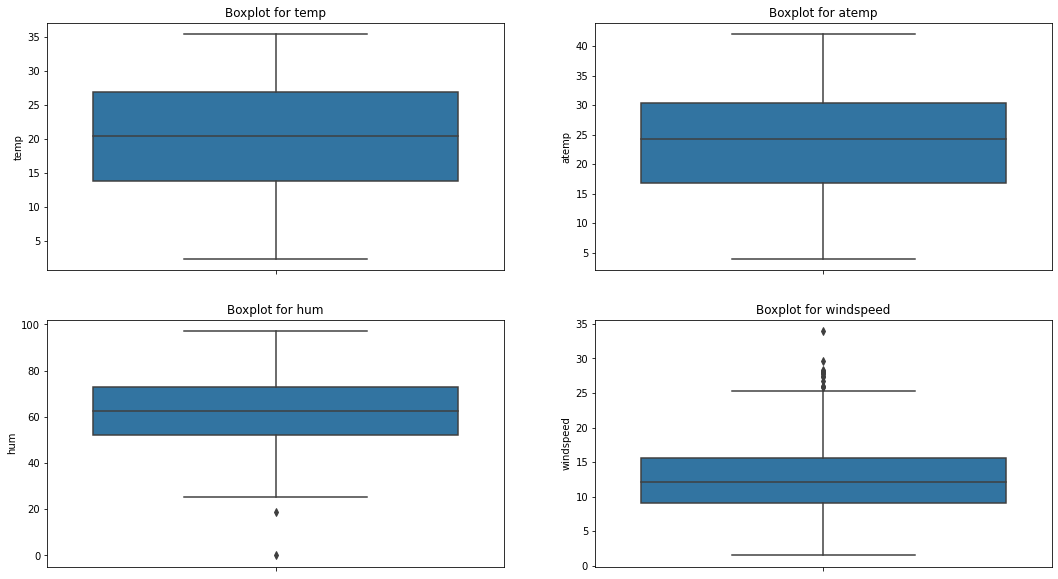

In [34]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,10))

i = 1
for col in cols:
    
    plt.subplot(2,2,i)
    plt.title(f"Boxplot for {col}")
    sns.boxplot(y=col, data=bike_df)
    i+=1

<Figure size 1080x2160 with 0 Axes>

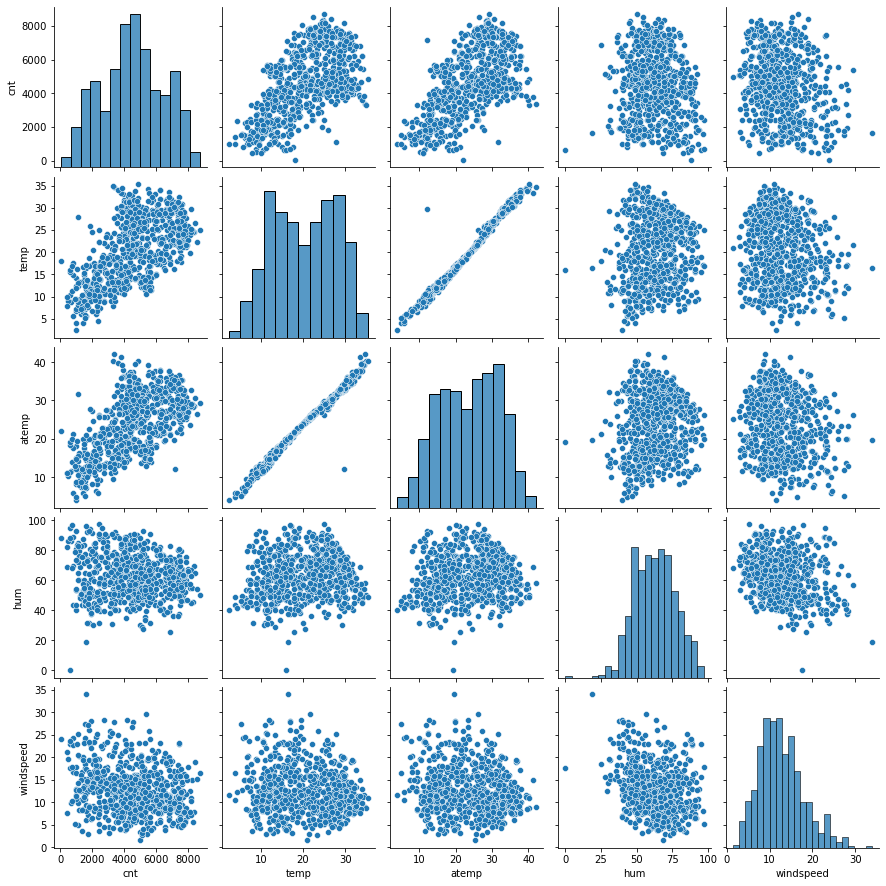

In [35]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’


SO we can see its fulfills one of the assumptions of linear regression:

There is a linear relationship between X and Y.

### Correlation between numeric variables

In [36]:
bike_df[[ 'temp', 'atemp', 'hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.00,0.99,0.13,-0.16,0.63
atemp,0.99,1.00,0.14,-0.18,0.63
hum,0.13,0.14,1.00,-0.25,-0.10
windspeed,-0.16,-0.18,-0.25,1.00,-0.24
cnt,0.63,0.63,-0.10,-0.24,1.00


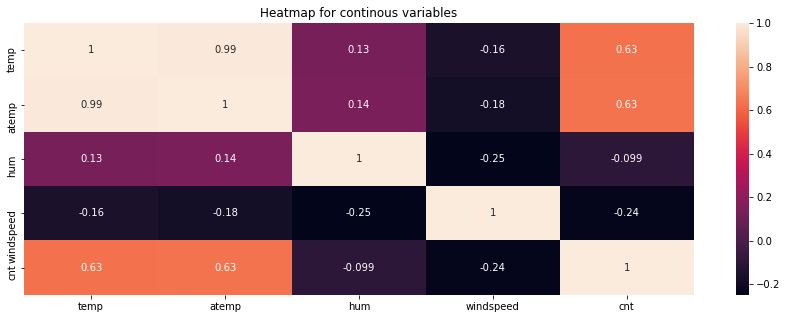

In [37]:
# Checking continuous variables relationship with each other
plt.figure(figsize = (15,5))
plt.title("Heatmap for continous variables")
sns.heatmap(bike_df[[ 'temp', 'atemp', 'hum','windspeed','cnt']].corr(), annot = True)
plt.show()

**remove atemp variable as its highly correlated with temp variable**

In [38]:
bike_df = bike_df.drop('atemp',axis=1)

In [39]:
bike_df = bike_df.drop('ratio',axis=1)

## EDA Analysis interpretation

I have done analysis on categorical columns using the boxplot and bar plot. Below are the few points we can infer from the visualization –


- **Season**: Fall season seems to have attracted more booking, followed by summer. We notice a median of about 5000 during the fall season. 
-  **Year**: 2019 showed more bike sharing counts as compared to 2018. 
-  **Month**: Most of the bookings has been done during the month of May, June, Aug, Sep and Oct. Trend increases starting from March till October and then it started decreasing as we approached the end of year. The highest cnt is obtained in the month of September because US experiences a clear weather. 
-  **Weekday**: Thursday, Friday, Saturday, and Sunday have a greater number of bookings as compared to the start of the week. 
-  **Workingday**: Booking seemed to be almost equal either on working day or non-working day.
-  **Weather Situation**: Clear weather situations have high cnt values for bike sharing. 


### Encoding

In [40]:
#Converting the year back to 0 and 1 
bike_df['yr'].replace({2018:0, 2019:1},inplace = True)

In [41]:
#Encoding the cat columns
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [42]:
#Print columns after creating dummies
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Rain',
       'weathersit_Mist'],
      dtype='object')

### Splitting into train test datasets

In [43]:

#Train Test split with 70:30 ratio
X_train, X_test = train_test_split(bike_df, test_size=0.3, random_state=10)

In [44]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)


(511, 29)
(219, 29)


In [45]:
X_train.head(2)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist
323,0,0,0,19.00,68.46,12.46,3520,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
72,0,0,1,13.33,49.70,9.17,2046,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
# Let us scale continuous variables
num_vars = ['temp','hum','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [47]:
#Inspect stats for Training set after scaling
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist
323,0,0,0,0.48,0.63,0.34,0.37,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
72,0,0,1,0.30,0.39,0.24,0.19,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
510,1,0,0,0.78,0.69,0.36,0.74,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
700,1,0,0,0.33,0.81,0.21,0.51,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
264,0,0,1,0.69,0.91,0.22,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


### Building model with all variables just to have a baseline model 

In [48]:
#CREATING X AND Y
y_train = X_train['cnt']
X_train = X_train.drop('cnt',axis=1)

In [49]:
# Build a Lienar Regression model using SKLearn
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
#Selecting  top n features using RFE
rfe = RFE(lr,n_features_to_select=16)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=16)

In [51]:
#Columns selected by RFE
[i for i in list(zip(X_train.columns,rfe.support_,rfe.ranking_)) if i[1]==True]

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Sept', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [52]:
#Selecting features those came out to be true in RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist'],
      dtype='object')

#### Cross checking the baseline model using statsmodel as well

In [53]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train)

In [54]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [55]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.43
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.17e-179
Time:                        14:23:48   Log-Likelihood:                 499.88
No. Observations:                 511   AIC:                            -941.8
Df Residuals:                     482   BIC:                            -818.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3614      0.048      7.606      0.000       0.268       0.455
yr                        0.2482      0.009     28.967      0.000       0.231       0.265
holiday                  -0.0807      0.028     -2.924      0.004      -0.135      -0.026
workingday               -0.0081      0.016     -0.499      0.618      -0.040       0.024
temp                      0.4338      0.046      9.479      0.000       0.344       0.524
hum                      -0.1621      0.035     -4.633      0.000      -0.231      -0.093
windspeed                -0.1794      0.029     -6.254      0.000      -0.236      -0.123
season_Spring            -0.1124      0.031     -3.658      0.000      -0.173      -0.052
season_Summer            -0.0064      0.028     -0.226      0.821      -0.062       0.049
season_Winter             0.0809      0.027      3.028      0.003       0.028       0.133
mnth_Aug                 -0.0274      0.036     -0.758      0.449      -0.099       0.044
mnth_Dec                 -0.0627      0.035     -1.808      0.071      -0.131       0.005
mnth_Feb                 -0.0385      0.035     -1.116      0.265      -0.106       0.029
mnth_Jan                 -0.0594      0.036     -1.672      0.095      -0.129       0.010
mnth_July                -0.0812      0.038     -2.162      0.031      -0.155      -0.007
mnth_June                -0.0191      0.025     -0.748      0.455      -0.069       0.031
mnth_Mar                  0.0151      0.026      0.580      0.562      -0.036       0.066
mnth_May                  0.0218      0.021      1.030      0.303      -0.020       0.063
mnth_Nov                 -0.0753      0.037     -2.010      0.045      -0.149      -0.002
mnth_Oct                  0.0063      0.037      0.172      0.863      -0.066       0.078
mnth_Sept                 0.0426      0.033      1.277      0.202      -0.023       0.108
weekday_Mon              -0.0130      0.023     -0.567      0.571      -0.058       0.032
weekday_Sat               0.0164      0.016      1.022      0.307      -0.015       0.048
weekday_Sun               0.0092      0.017      0.527      0.598      -0.025       0.043
weekday_Thu               0.0152      0.015      0.996      0.320      -0.015       0.045
weekday_Tue              -0.0240      0.019     -1.267      0.206      -0.061       0.013
weekday_Wed              -0.0122      0.016     -0.783      0.434      -0.043       0.018
weathersit_Light Rain    -0.2054      0.029     -7.169      0.000      -0.262      -0.149
weathersit_Mist          -0.0541      0.011     -4.726      0.000      -0.077      -0.032
==============================================================================
Omnibus:                       83.545   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarqu

**Inference:**
  
There are many variables whose P value is quite high and hence wont be required. 

Since we will follow stepwise approach using the vif score and p value to remove 1 feature at each step. 


In [56]:
#Function to calculate VIFs 
def calculate_vif(col):
    xtrain_df = X_train[col]
    vif_df = pd.DataFrame()
    vif_df['Features'] = xtrain_df.columns
    vif_df['VIF'] = [variance_inflation_factor(xtrain_df.values, i) for i in range(xtrain_df.shape[1])]
    vif_df = vif_df.sort_values(by='VIF',ascending=False)
    return vif_df

In [57]:
#Function to build a model using statsmodels
def build_linear_model(col):
    X_train_model = sm.add_constant(X_train[col])
    lm = sm.OLS(y_train, X_train_model).fit()
    print(lm.summary())
    return lm

## Model Building 

In [58]:
## checking for columns selected for RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist'],
      dtype='object')

In [59]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist']

In [60]:
print(calculate_vif(cols))
build_linear_model(cols)

                 Features   VIF
3                     hum 17.52
2                    temp 15.93
4               windspeed  4.88
5           season_Spring  4.49
6           season_Winter  2.91
15        weathersit_Mist  2.50
10               mnth_Jan  2.42
9                mnth_Feb  2.17
0                      yr  2.08
12               mnth_Nov  1.90
8                mnth_Dec  1.75
11              mnth_July  1.61
7                mnth_Aug  1.47
14  weathersit_Light Rain  1.44
13              mnth_Sept  1.34
1                 holiday  1.06
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.90e-189
Time:                        14:23:49   Log-Likelihood:      

Varibale Hum has the highest VIF. 

Hence dropping it.

In [61]:
#remove hum variable
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist']

In [62]:
print(calculate_vif(cols))
build_linear_model(cols)

                 Features  VIF
2                    temp 6.30
3               windspeed 4.85
4           season_Spring 4.24
5           season_Winter 2.72
9                mnth_Jan 2.30
8                mnth_Feb 2.15
0                      yr 2.05
11               mnth_Nov 1.85
7                mnth_Dec 1.65
14        weathersit_Mist 1.55
10              mnth_July 1.53
6                mnth_Aug 1.45
12              mnth_Sept 1.34
13  weathersit_Light Rain 1.11
1                 holiday 1.06
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.31e-186
Time:                        14:23:49   Log-Likelihood:                 481.76
No. Observations:             

Varibale temp has the highest VIF. 

Hence dropping it.

In [63]:
#remove temp variable
cols = ['yr', 'holiday', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist']

print(calculate_vif(cols))
build_linear_model(cols)

                 Features  VIF
3           season_Spring 4.23
2               windspeed 2.91
4           season_Winter 2.65
8                mnth_Jan 2.26
7                mnth_Feb 2.12
0                      yr 1.85
10               mnth_Nov 1.82
6                mnth_Dec 1.62
13        weathersit_Mist 1.51
11              mnth_Sept 1.17
5                mnth_Aug 1.14
12  weathersit_Light Rain 1.11
9               mnth_July 1.10
1                 holiday 1.06
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     146.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.80e-166
Time:                        14:23:49   Log-Likelihood:                 431.25
No. Observations:                 511   AIC:                 

Varibale mnth_July has the highest P value. 

Hence dropping it.

In [64]:
#remove  mnth_July variable
cols = ['yr', 'holiday', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist']
print(calculate_vif(cols))
build_linear_model(cols)

                 Features  VIF
3           season_Spring 4.18
2               windspeed 2.79
4           season_Winter 2.63
8                mnth_Jan 2.26
7                mnth_Feb 2.12
0                      yr 1.83
9                mnth_Nov 1.82
6                mnth_Dec 1.62
12        weathersit_Mist 1.51
10              mnth_Sept 1.16
5                mnth_Aug 1.13
11  weathersit_Light Rain 1.11
1                 holiday 1.05
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     156.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.32e-166
Time:                        14:23:49   Log-Likelihood:                 429.56
No. Observations:                 511   AIC:                            -831.1
Df Residuals:

**We can see that VIF is less than 5 and P value is less than 0.05 for all variables .**

But we can still add and remove variables to improve our model.

In [65]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [66]:
#adding  'season_Summer' variable
cols = ['yr', 'holiday', 'windspeed', 'season_Spring','season_Summer',
       'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist',]
print(calculate_vif(cols))
build_linear_model(cols)

                 Features  VIF
3           season_Spring 4.86
2               windspeed 4.40
5           season_Winter 3.01
9                mnth_Jan 2.26
4           season_Summer 2.17
8                mnth_Feb 2.12
0                      yr 1.90
10               mnth_Nov 1.83
7                mnth_Dec 1.62
13        weathersit_Mist 1.61
6                mnth_Aug 1.28
11              mnth_Sept 1.27
12  weathersit_Light Rain 1.11
1                 holiday 1.05
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.53e-167
Time:                        14:23:49   Log-Likelihood:                 433.51
No. Observations:                 511   AIC:                 

**Have to remove the Mnth_Aug variable based on high P value.**

In [67]:
#removing  'mnth_Aug' variable
cols = ['yr', 'holiday', 'windspeed', 'season_Spring','season_Summer',
       'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist',]
print(calculate_vif(cols))
build_linear_model(cols)

                 Features  VIF
3           season_Spring 4.58
2               windspeed 3.77
5           season_Winter 2.86
8                mnth_Jan 2.26
7                mnth_Feb 2.12
4           season_Summer 1.92
0                      yr 1.85
9                mnth_Nov 1.82
6                mnth_Dec 1.62
12        weathersit_Mist 1.58
10              mnth_Sept 1.23
11  weathersit_Light Rain 1.11
1                 holiday 1.05
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.04e-168
Time:                        14:23:49   Log-Likelihood:                 433.17
No. Observations:                 511   AIC:                            -838.3
Df Residuals:

In [68]:
#removing  season_Winter' variable
cols = ['yr', 'holiday', 'windspeed', 'season_Spring','season_Summer',
        'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist']
print(calculate_vif(cols))
build_linear_model(cols)

                 Features  VIF
3           season_Spring 3.92
2               windspeed 3.50
7                mnth_Jan 2.20
6                mnth_Feb 2.08
0                      yr 1.78
4           season_Summer 1.74
11        weathersit_Mist 1.51
5                mnth_Dec 1.29
8                mnth_Nov 1.26
9               mnth_Sept 1.23
10  weathersit_Light Rain 1.10
1                 holiday 1.05
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.93e-169
Time:                        14:23:49   Log-Likelihood:                 433.05
No. Observations:                 511   AIC:                            -840.1
Df Residuals:                     498   BIC:

**We can see that the VIF and P value now seems significant and hence we believe we can build the model using remaining variables.**

Also,

**The Adjusted R squared is 80.2**

**Overall ,The model is also significant.**


In [69]:
##Final Results from trying various columns

**R square - 80.7** 

**Adjusted R square - 80.2**

After trying multiple combinations , we come to conclusion that the below variables are best suited for creating the model.
-  holiday
-  windspeed
-  year
-  season_Spring
-  season_Summer
-  mnth_Dec
-  mnth_Jan
-  mnth_Feb
-  mnth_Sept
-  mnth_Nov
-  weathersit_Light Rain
-  weathersit_Mist

## Final Model Building

In [70]:
training_X = X_train[['yr', 'holiday', 'windspeed', 'season_Spring','season_Summer',
        'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov', 'mnth_Sept', 'weathersit_Light Rain',
       'weathersit_Mist']]

In [71]:
# Add a constant
training_X_m = sm.add_constant(training_X)

# Creating  model
lr = sm.OLS(y_train, training_X_m).fit()

we can consider threshold of 5 for VIF as this means the R squared for variable is 0.8

In [72]:
calculate_vif(training_X.columns)

,Features,VIF
3,season_Spring,3.92
2,windspeed,3.50
7,mnth_Jan,2.20
6,mnth_Feb,2.08
0,yr,1.78
4,season_Summer,1.74
11,weathersit_Mist,1.51
5,mnth_Dec,1.29
8,mnth_Nov,1.26
9,mnth_Sept,1.23


Here we can confirm the model fulfills another assumption of linear regression

In [73]:
build_linear_model(training_X.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.93e-169
Time:                        14:23:50   Log-Likelihood:                 433.05
No. Observations:                 511   AIC:                            -840.1
Df Residuals:                     498   BIC:                            -785.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.57

**F statistic is 173.1 which is good**

**The F-Statistics value which is greater than 1 states that the overall model is significant**

In [74]:
y_train_pred = lr.predict(training_X_m)

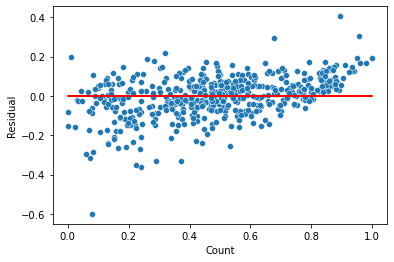

In [75]:
#Plotting residual to check for heteroscedasticity
y_train_pred = lr.predict(training_X_m)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**NO clear pattern so our assumption on homoscedasticity can hold true.**

Constant variance

Text(0.5, 0, 'Errors')

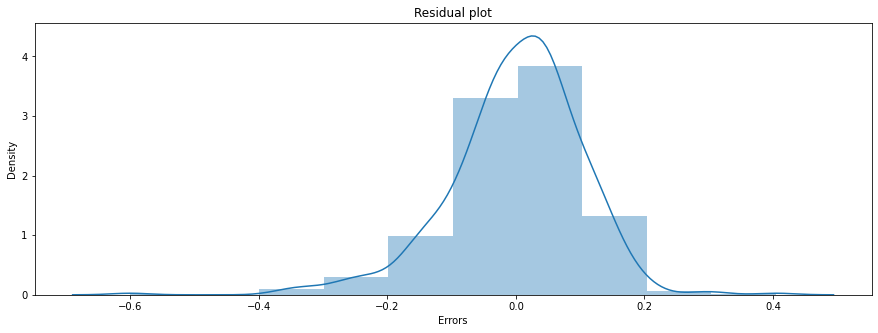

In [76]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
plt.figure(figsize = (15,5))
sns.distplot((res), bins = 10)
plt.title("Residual plot")  
plt.xlabel('Errors') 

Error terms are normally distributed with mean around 0. 

So it fulfills another assumption

In [77]:
training_X.columns

Index(['yr', 'holiday', 'windspeed', 'season_Spring', 'season_Summer',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov', 'mnth_Sept',
       'weathersit_Light Rain', 'weathersit_Mist'],
      dtype='object')

In [78]:
X_test.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist
566,1,0,0,24.43,86.54,14.29,4459,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
374,1,0,1,12.66,64.65,12.57,3598,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
181,0,0,1,29.62,39.62,6.87,5362,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Predictions

In [79]:
#Scaling the test data

num_vars=['temp','hum','windspeed','cnt']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [80]:
#Creating x and y sets

y_test = X_test.pop('cnt')
X_test = X_test

In [81]:
#Selecting the variables that were part of final model.
col1=training_X.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 566 to 105
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   holiday                219 non-null    int64  
 3   windspeed              219 non-null    float64
 4   season_Spring          219 non-null    uint8  
 5   season_Summer          219 non-null    uint8  
 6   mnth_Dec               219 non-null    uint8  
 7   mnth_Feb               219 non-null    uint8  
 8   mnth_Jan               219 non-null    uint8  
 9   mnth_Nov               219 non-null    uint8  
 10  mnth_Sept              219 non-null    uint8  
 11  weathersit_Light Rain  219 non-null    uint8  
 12  weathersit_Mist        219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(9)
memory usage: 10.5 KB


In [82]:
# Making predictions using the final model

y_pred = lr.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

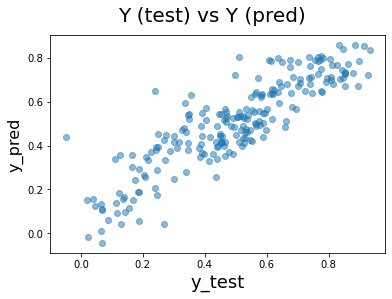

In [83]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('Y (test) vs Y (pred)', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

## Model Evaluation

In [84]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, y_pred)

0.7736557998960898

In [85]:
#Returns the mean squared error; we'll take a square root
mean_squared_error(y_test, y_pred)

0.011798135127979205

In [86]:
r2 = r2_score(y_test, y_pred)

In [87]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7604707008609106

In [88]:
X_test.min()

yr                      0.00
holiday                 0.00
windspeed               0.04
season_Spring           0.00
season_Summer           0.00
mnth_Dec                0.00
mnth_Feb                0.00
mnth_Jan                0.00
mnth_Nov                0.00
mnth_Sept               0.00
weathersit_Light Rain   0.00
weathersit_Mist         0.00
dtype: float64

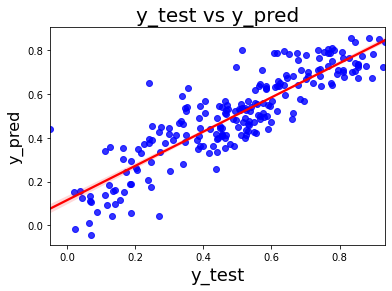

In [89]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [90]:
residual = y_test - y_pred

In [91]:
np.mean(residual)

-0.007953918337726757

C:\Users\GAUTAM~1.BHU\AppData\Local\Temp/ipykernel_11820/1868037648.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


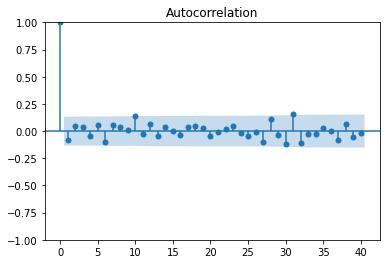

In [92]:
#TO check for Autocorrelation

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

All in All , 

Model is significant , giving good results and validated all the assumptions.

**We can proceed with the interpretation of the coefficients.**

### Final model score:
    
    
**R squared          - 77.36**

**Adjusted R squared - 76.04**

## Interpretation of the model

In [93]:
#check the coefficients
lr.params

const                    0.57
yr                       0.26
holiday                 -0.08
windspeed               -0.16
season_Spring           -0.22
season_Summer           -0.06
mnth_Dec                -0.15
mnth_Feb                -0.11
mnth_Jan                -0.17
mnth_Nov                -0.14
mnth_Sept                0.04
weathersit_Light Rain   -0.29
weathersit_Mist         -0.09
dtype: float64

The equation for the linear regression will be as follows:


**X**   =    **const * 0.57** + **yr * 0.26** + **holiday * (-0.08)** + **windspeed * (-0.16)** +   **season_Spring * (-0.22)** + **season_Summer * (-0.06)** + **mnth_Dec * (-0.15)** + **mnth_Jan * (-0.17)** + **mnth_Feb * (-0.11)** + **mnth_Sept * (0.04)** + **mnth_Nov * (-0.14)** +  **weathersit_Light Rain * (-0.29)**** + **weathersit_Mist * (-0.09)**

As per our final Model, the top 3 predictor variables that influences the bike booking are:

- yr - A coefficient value of "0.26" indicated that a unit increase in yr variable increases the bike hire numbers by "0.26" units.
- weathersit_Light_Rain - A coefficient value of "-0.29" indicated that, w.r.t weathersit_Light_Rain, a unit increase in weathersit_Light_Rain variable decreases the bike hire numbers by "0.29" units.
- season Spring - A coefficient value of "-0.22" indicated that a unit increase in season spring variable increases the bike hire numbers by "-0.22" units.

## Recommendations

Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- There would be less bookings during Light Rain and Winter months, they could probably use this time to service the bikes without having business impact.

Hence when the situation comes back to normal,
- the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.